In [30]:
%matplotlib widget 

import scipy
import numpy as np
from scipy.optimize import LinearConstraint, minimize, NonlinearConstraint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from itertools import combinations
from math import comb

n = 4
symbols = sp.symbols('a_:'+str(n**2))
matrix = sp.Matrix(n,n, symbols)
string_matrix = [['' for i in range(n)] for j in range(n)]

m=0
A = np.zeros((n, comb(n, 2)))
for j in range(n):   
    for k in range(j,n):
        if k == j:
            matrix[j,k] = 'a_16'
            continue
        m+=1
        string_matrix[j][k] = '-a_'+str(m)
        string_matrix[k][j] = '-a_'+str(m)
        matrix[j,k] = 'a_'+str(m)
        matrix[k,j] = 'a_'+str(m)
        A[j][m-1] = 1
        A[k][m-1] = 1

    row_sum = '1'
    for k in range(n):
        row_sum += string_matrix[j][k]
    matrix[j,j] = row_sum

print(A)

matrix_constraints = LinearConstraint(A, np.zeros(n), np.ones(n))

def sum_matrix_minors(matrix, k):
    return sum(matrix[i, i].det() for i in combinations(range(n), k))

def run_function_with_const(loc, constraints = matrix_constraints):
    bounds = [(0.0, 1.0)] * comb(n, 2)

    count = 0
    best_result = None
    num_starts = 10
    while count < 30:
        #results = [minimize(funcs_of_principal_minors[loc], np.random.rand(comb(n, 2)), bounds=bounds, constraints=constraints, tol=1e-,8 options={'maxiter': 3000}) for _ in range(num_starts)]
        results = [minimize(funcs_of_principal_minors[loc], np.random.rand(6), bounds=bounds, constraints=constraints, method='trust-constr', tol=1e-8, options={'maxiter': 100, 'initial_constr_penalty': 10000}) for _ in range(num_starts)]

        best_result = results[0]
        is_false = False
        for result in results:
            if result.success:
                is_false = True
                best_result = result
                break

        if is_false:
            for result in results:
                if result.fun <= best_result.fun and result.success:
                    best_result = result
            return best_result
            
        else:
            count += 1
            num_starts = 100

    print(count)
    return best_result

def optimize_func(loc, eqs = []):
    if len(eqs) == 0:
        return run_function_with_const(loc)
    equals = []
    for i in range(0, len(eqs)):
        equals.append(NonlinearConstraint(
        lambda x: funcs_of_principal_minors[eqs[i][0]](x) - eqs[i][1],
        [0.0],
        [0.0]
    ))
    equals.append(matrix_constraints)
    return run_function_with_const(loc, equals)

funcs_of_principal_minors = tuple(
    sp.lambdify([symbols[1:comb(n, 2)+1]], sum_matrix_minors(matrix, k), 'numpy')
    for k in range(1, n+1)
) + tuple(
    sp.lambdify([symbols[1:comb(n, 2)+1]], -1*sum_matrix_minors(matrix, k), 'numpy')
    for k in range(1, n+1)
)

[[1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 1.]]


In [16]:
result_min = optimize_func(1)
result_max = optimize_func(1+n)

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

print(result_max)

0
0
Minimum value found: -1.990514434723436
Achieved at: [1.165e-03 9.976e-01 3.231e-05 1.642e-04 9.977e-01 8.186e-04]
Maximum value found: 5.965844110456405
Achieved at: [8.311e-04 8.177e-05 1.212e-03 1.180e-03 1.012e-03 1.382e-03]
 barrier_parameter: 0.004000000000000001
 barrier_tolerance: 0.004000000000000001
          cg_niter: 19
      cg_stop_cond: 4
            constr: [array([0.002, 0.003, 0.003, 0.004]), array([8.311e-04, 8.177e-05, 1.212e-03, 1.180e-03, 1.012e-03, 1.382e-03])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 10000
  constr_violation: 0.0
    execution_time: 0.01665210723876953
               fun: -5.965844110456405
              grad: array([5.984, 5.982, 5.985, 5.985, 5.986, 5.986])
               jac: [array([[1., 1., 1., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 1.]]), array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
      

In [27]:
result_min = optimize_func(1, [[0, 2]])
result_max = optimize_func(1+n, [[0+n, -2]])

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print(result_min)
print()
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

print(result_max)

Minimum value found: -7.105427357601002e-15
Achieved at: [8.408e-16 1.000e+00 0.000e+00 1.309e-15 4.713e-16 0.000e+00]
     fun: -7.105427357601002e-15
     jac: array([-3., -6., -3., -3., -2., -3.])
 message: 'Optimization terminated successfully'
    nfev: 28
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([8.408e-16, 1.000e+00, 0.000e+00, 1.309e-15, 4.713e-16, 0.000e+00])

Maximum value found: 1.333333333333334
Achieved at: [0.167 0.167 0.167 0.167 0.167 0.167]
     fun: -1.333333333333334
     jac: array([3.333, 3.333, 3.333, 3.333, 3.333, 3.333])
 message: 'Optimization terminated successfully'
    nfev: 61
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.167, 0.167, 0.167, 0.167, 0.167, 0.167])


In [119]:
result_min = optimize_func(2, [[0,1],[1,-3/4]])
result_max = optimize_func(2+n, [[0+n,-1],[1+n,3/4]])

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

print(result_max)
print(result_min)

Minimum value found: -0.8051593552102769
Achieved at: [9.003e-01 1.642e-16 9.969e-02 0.000e+00 9.969e-02 4.000e-01]
Maximum value found: 0.2481589453266846
Achieved at: [0.221 0.496 0.283 0.283 0.496 0.221]
     fun: -0.2481589453266846
     jac: array([-1.311, -1.   , -1.189, -1.189, -1.   , -1.311])
 message: 'Optimization terminated successfully'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.221, 0.496, 0.283, 0.283, 0.496, 0.221])
     fun: -0.8051593552102769
     jac: array([-1.923,  0.84 ,  0.8  ,  0.84 ,  0.8  ,  1.641])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([9.003e-01, 1.642e-16, 9.969e-02, 0.000e+00, 9.969e-02, 4.000e-01])


In [151]:
result_min = optimize_func(2, [[0,4], [1, 6]])
result_max = optimize_func(2+n, [[0+n,-4], [1+n, -6]])

np.set_printoptions(precision=3)

print("Minimum value found:", result_min.fun)
print("Achieved at:", result_min.x)
print("Maximum value found:", -1*result_max.fun)
print("Achieved at:", result_max.x)

print(result_max)
print(result_min)

/home/ben/.local/lib/python3.10/site-packages/scipy/optimize/_trustregion_constr/projections.py:181: UserWarning:

Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.



0
0
Minimum value found: 3.9999986904222506
Achieved at: [ 3.375e-06 -3.656e-06 -3.711e-06  2.051e-06  5.635e-06 -3.475e-06]
Maximum value found: 3.999998194104219
Achieved at: [-4.016e-06  1.433e-05 -4.534e-06 -3.940e-06  3.142e-06 -4.678e-06]
 barrier_parameter: 0.1
 barrier_tolerance: 0.1
          cg_niter: 30
      cg_stop_cond: 2
            constr: [array([1.806e-06]), array([1.806e-06]), array([ 5.776e-06, -4.814e-06,  5.710e-06, -6.070e-06]), array([-4.016e-06,  1.433e-05, -4.534e-06, -3.940e-06,  3.142e-06,
       -4.678e-06])]
       constr_nfev: [154, 154, 0, 0]
       constr_nhev: [0, 0, 0, 0]
       constr_njev: [0, 0, 0, 0]
    constr_penalty: 355924748970638.0
  constr_violation: 6.0704894339629645e-06
    execution_time: 0.0469975471496582
               fun: -3.999998194104219
              grad: array([6., 6., 6., 6., 6., 6.])
               jac: [array([[6., 6., 6., 6., 6., 6.]]), array([[6., 6., 6., 6., 6., 6.]]), array([[1., 1., 1., 0., 0., 0.],
       [1., 0., 0.

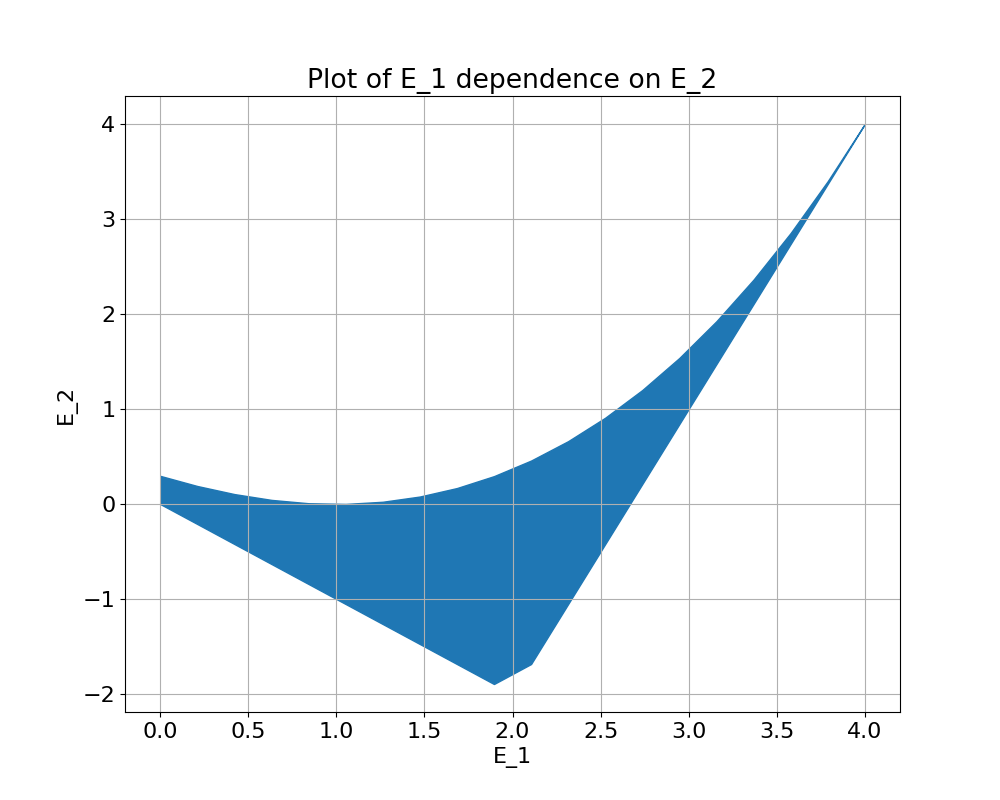

In [131]:
x_values = np.linspace(0, n, 20)

# Calculate corresponding y values
min_y_values = [optimize_func(2, [[0,x]]).fun for x in x_values]
max_y_values = [-1*optimize_func(2+n, [[0+n,-x]]).fun for x in x_values]

# Plot the function
plt.figure(figsize=(10, 8))
plt.fill_between(x_values, min_y_values, max_y_values, interpolate=True, label='E_1 dependence on E_2', color='C0')

font = {'size': 16}
plt.rc('font', **font)

plt.title('Plot of E_1 dependence on E_2')
plt.xlabel('E_1')
plt.ylabel('E_2')
plt.grid(True)
plt.savefig('test.png', bbox_inches='tight')

         3          2
0.03704 x + 0.2222 x - 0.5556 x + 0.2963
R-Value: 1.0


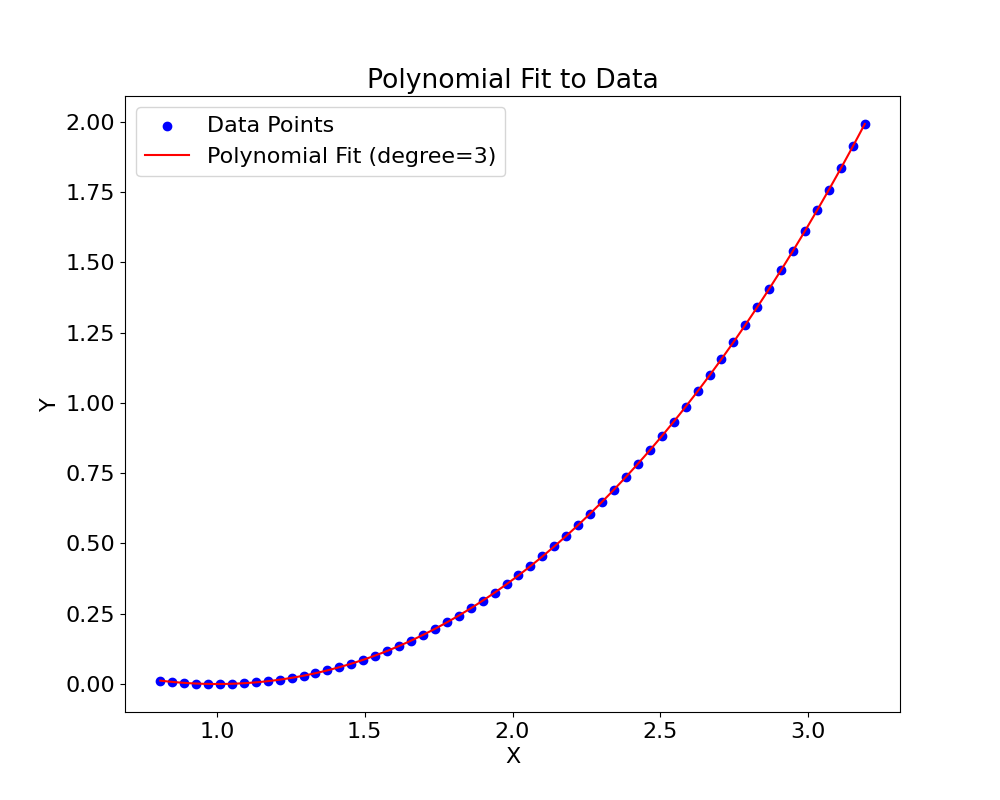

In [24]:
import numpy.polynomial.polynomial as poly

x = x_values[20:80]
y = max_y_values[20:80]


# Fit a polynomial of degree n (change n as needed)
degree = 3
coefficients = np.polyfit(x, y, degree)
#poly_func = poly.Polynomial.fit(x, y, degree)
#print(coefficients)

# Generate a polynomial function from the coefficients
poly_func = np.poly1d(coefficients)

print(poly_func)

# Calculate R-squared
y_pred = poly_func(x)
residuals = y - y_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

print("R-Value:", r_squared)

# Generate values for plotting the fitted polynomial
x_fit = np.linspace(min(x), max(x), 100)
y_fit = poly_func(x_fit)

# Plotting the data points and the fitted polynomial
plt.close()
plt.figure(figsize=(10, 8))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_fit, y_fit, color='red', label=f'Polynomial Fit (degree={degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Fit to Data')
plt.legend()
plt.show()

In [31]:
# Generate data points
x_values = np.linspace(0, n, 10)

min_y_values = [optimize_func(1, [[0,x]]).fun for x in x_values]
max_y_values = [-1*optimize_func(1+n, [[0+n,-x]]).fun for x in x_values]

# Create lists to store meshgrid points
X_mesh = []
Y_mesh = []

# Generate meshgrid points
i=0
for xi in x_values:
    y_vals = np.linspace(min_y_values[i], max_y_values[i], 5)
    i = i+1
    X_mesh.append(np.full_like(y_vals, xi))
    Y_mesh.append(y_vals)

X = np.concatenate(X_mesh)
Y = np.concatenate(Y_mesh)

print("XY Done")


Z_min = [optimize_func(2, [[0,x], [1,y]]).fun for x,y in zip(X,Y)]
print("Z min Done")
Z_max = [-1*optimize_func(2+n, [[0+n,-x], [1+n,-y]]).fun for x,y in zip(X,Y)]
print("Z Done")

/home/ben/.local/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning:

delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.



XY Done


/home/ben/.local/lib/python3.10/site-packages/scipy/optimize/_trustregion_constr/projections.py:181: UserWarning:

Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.



Z min Done
Z Done


/home/ben/.local/lib/python3.10/site-packages/traitlets/traitlets.py:1385: DeprecationWarning:

Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.



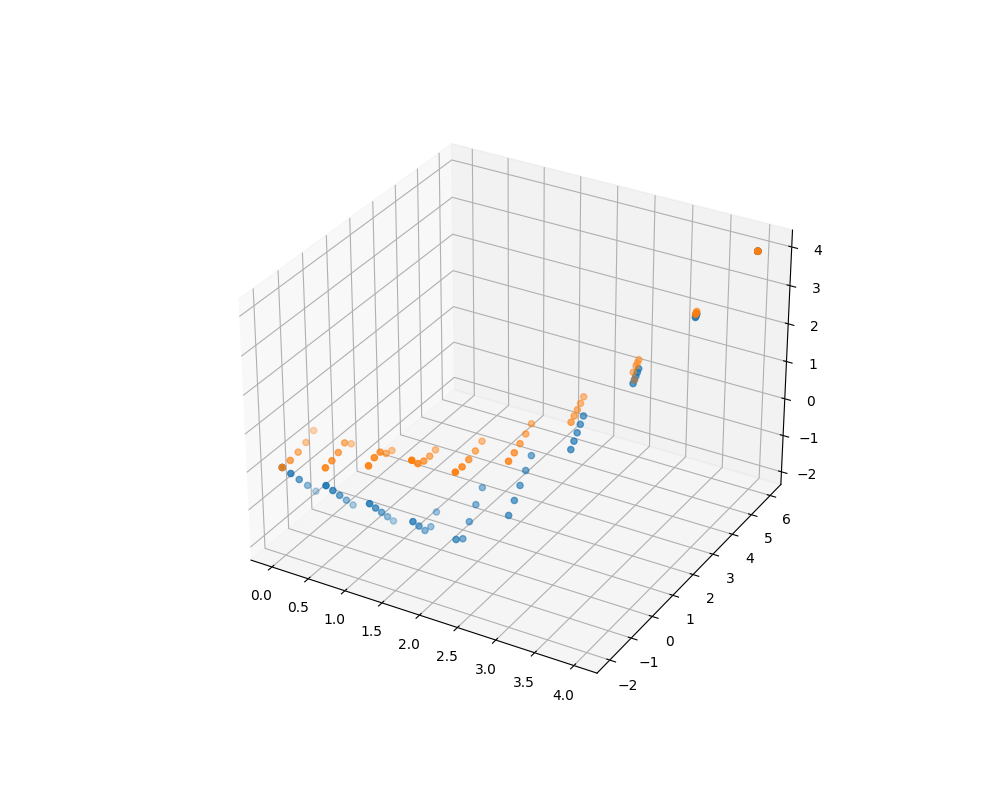

In [32]:
# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') 
out_plot = ax.scatter(X, Y, Z_min, color='C0')
out_plot = ax.scatter(X, Y, Z_max, color='C1')


In [57]:
# Only for n=3

from sympy import symbols, solve

# Define the variables
x, y = symbols('x y', real=True)

# Define the equations
eq1 = x + y + 1
eq2 = x*y

min_x_points = []
min_y_points = []
for point in zip(x_values,min_y_values):
    eq1_temp = eq1 - point[0]
    eq2_temp = eq2 - point[1]

    # Solve the system
    solutions = solve([eq1_temp, eq2_temp], [x, y])

    if solutions:
        for solution in solutions:
            min_x_points.append(solution[0])
            min_y_points.append(solution[1])

max_x_points = []
max_y_points = []
for point in zip(x_values,max_y_values):
    eq1_temp = eq1 - point[0]
    eq2_temp = eq2 - point[1]

    # Solve the system
    solutions = solve([eq1_temp, eq2_temp], [x, y])

    if solutions:
        for solution in solutions:
            max_x_points.append(solution[0])
            max_y_points.append(solution[1])

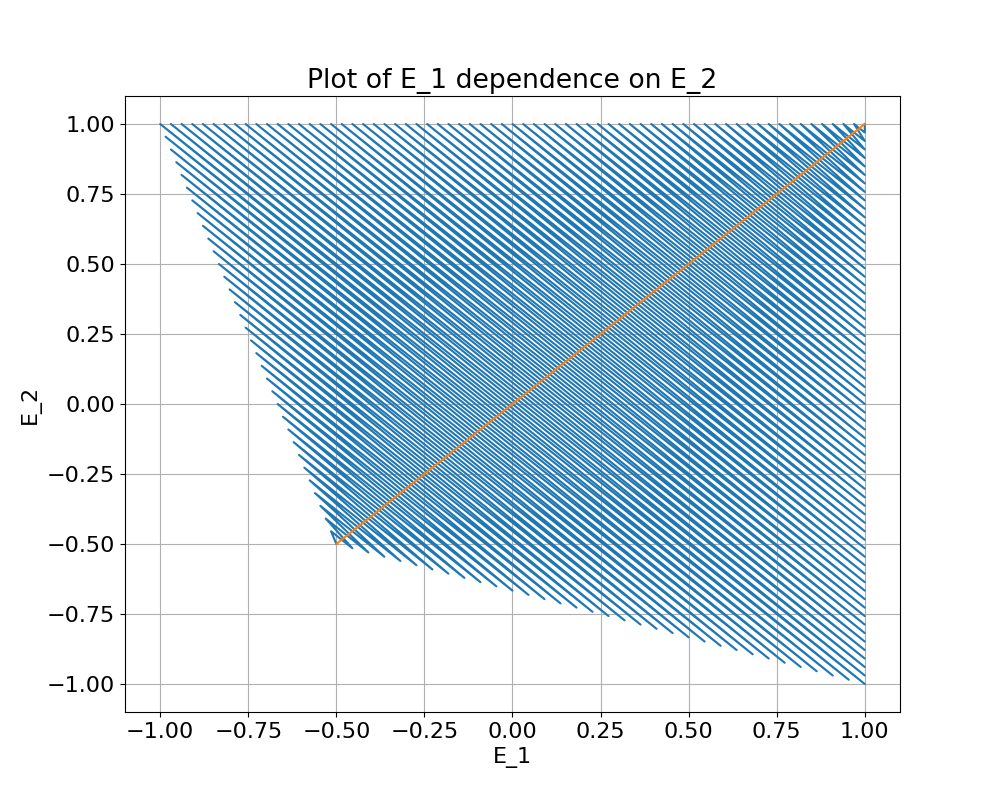

In [58]:
# Plot the function
plt.figure(figsize=(10, 8))
plt.plot(min_x_points, min_y_points)
plt.plot(max_x_points, max_y_points)

font = {'size': 16}
plt.rc('font', **font)

plt.title('Plot of E_1 dependence on E_2')
plt.xlabel('E_1')
plt.ylabel('E_2')
plt.grid(True)
plt.savefig('test.png', bbox_inches='tight')

In [33]:
from sympy import symbols, nonlinsolve, Reals

# Define the variables
x, y, z = symbols('x y z', real=True)

# Define the equations
eq1 = x + y + z + 1
eq2 = x + y + z + x*y + x*z + y*z
eq3 = x*y + x*z + y*z + x*y*z

min_x_points = []
min_y_points = []
min_z_points = []
i=0
for point in zip(X,Y,Z_min):
    eq1_temp = eq1 - point[0]
    eq2_temp = eq2 - point[1]
    eq3_temp = eq3 - point[2]

    # Solve the system
    solutions = nonlinsolve([eq1_temp, eq2_temp, eq3_temp], [x, y, z]) & Reals ** 3

    if i % 50 == 0:
        print(i)

    i+=1

    if solutions:
        for solution in solutions:
            min_x_points.append(solution[0])
            min_y_points.append(solution[1])
            min_z_points.append(solution[2])

max_x_points = []
max_y_points = []
max_z_points = []
i=0
for point in zip(X,Y,Z_max):
    eq1_temp = eq1 - point[0]
    eq2_temp = eq2 - point[1]
    eq3_temp = eq3 - point[2]

    # Solve the system
    solutions = nonlinsolve([eq1_temp, eq2_temp, eq3_temp], [x, y, z]) & Reals ** 3

    if i % 50 == 0:
        print(i)

    i+=1

    if solutions:
        for solution in solutions:
            max_x_points.append(solution[0])
            max_y_points.append(solution[1])
            max_z_points.append(solution[2])

0
0


In [34]:
import numpy as np
import plotly.graph_objects as go

marker_data_1 = go.Scatter3d(
    x=max_x_points, 
    y=max_y_points, 
    z=max_z_points, 
    marker=go.scatter3d.Marker(size=4), 
    opacity=0.8, 
    mode='markers'
)
marker_data_2 = go.Scatter3d(
    x=min_x_points, 
    y=min_y_points, 
    z=min_z_points, 
    marker=go.scatter3d.Marker(size=4), 
    opacity=1, 
    mode='markers'
)

fig=go.Figure(data=[marker_data_1, marker_data_2])
fig.write_html("scatter_3d.html")
